In [1]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import dtale as dt
from ipyvizzu import Chart, Data, Config, Style
import plotly.express as px
import ast
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

In [2]:
df=pd.read_csv("realEstate.csv")

In [3]:


df['location'] = df['location'].apply(ast.literal_eval)

# Extract the 'lat' and 'lng' into separate columns
df[['lat', 'lng']] = df['location'].apply(lambda x: pd.Series({'lat': x['lat'], 'lng': x['lng']}))

# Convert 'lat' and 'lng' columns to float
df['lat'] = df['lat'].astype(float)
df['lng'] = df['lng'].astype(float)

# Drop the original 'location' column if no longer needed
df = df.drop(columns=['location'])


In [4]:
pd.set_option('display.precision', 12)

In [5]:
df = df.drop(['user_id', 'id','title', 'content','imgs', 'create_time','path','UserName','profileImg'], axis=1)

In [6]:
df['area'] = df.apply(lambda row: row['length'] * row['width'] if pd.isnull(row['area']) else row['area'], axis=1)

In [7]:
df = df.drop(df[df['price'] >100000].index)

In [63]:
df = df.drop(df[df['price'] <1200].index)

In [64]:
dt.show(df)

/opt/anaconda3/lib/python3.11/site-packages/dtale/views.py:816: FutureWarning:

['advertiser_type'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



In [11]:
df.columns

Index(['price', 'refresh', 'beds', 'livings', 'wc', 'area', 'street_width',
       'age', 'last_update', 'ketchen', 'ac', 'furnished', 'district', 'width',
       'length', 'advertiser_type', 'review', 'iam_verified', 'onMarket',
       'IsRent', 'lat', 'lng'],
      dtype='object')

In [54]:
dt.show(df)

/opt/anaconda3/lib/python3.11/site-packages/dtale/views.py:816: FutureWarning:

['advertiser_type'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



In [5]:
df = df.drop(['user_id', 'id','title', 'content','imgs', 'create_time','path','UserName','profileImg'], axis=1)

In [21]:
df['price'].unique()

array([ 20000,  25000,  22000,  38000,  40000,  85000,  42000,  28000,
        19000,  27000,  70000,  34000,  50000,  78000,  10000,  30000,
        24000,  15000,  53000,  90000,  14000,  89000,  32000,  75000,
        18000,  35000,  60000,  16000,  33000,  36000,  21000,  23000,
        29000,  39000,  46000,  17000,  80000, 120000, 130000,  65000,
        45000,  68000, 135000,  55000,   6999,  58000,  20150,  40956,
        31000,  13000,  44000,  48000,  95000,  47000,  19500, 360000,
        37500,  83000,  37000, 100000,  49000,   6500,  12000,  26000,
        63000, 155000,  74000,   1800,  23500,  41000,  62000,  52000,
       140000,  13500,  64000, 133000,   2399,   2500,  43000,   9000,
        67000, 110000,   4000,  87000,  44500, 125000,  66000,  28500,
        30500, 250000,  57000,  88000, 180000,  61500,  11000,  33500,
        94000,   2600,  21500,  77000, 450000,    250,  72000, 115000,
       150000,  18500,  54000, 160000,  84000,  58500, 165000,  40200,
      

In [13]:
df["lat"].unique()

array([24.80093 , 24.687521, 24.921463, ..., 24.807284, 24.870188,
       24.843407])

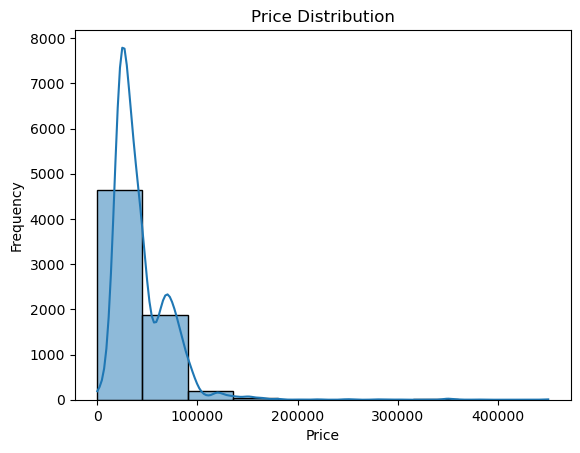

In [8]:
sns.histplot(df['price'], bins=10, kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

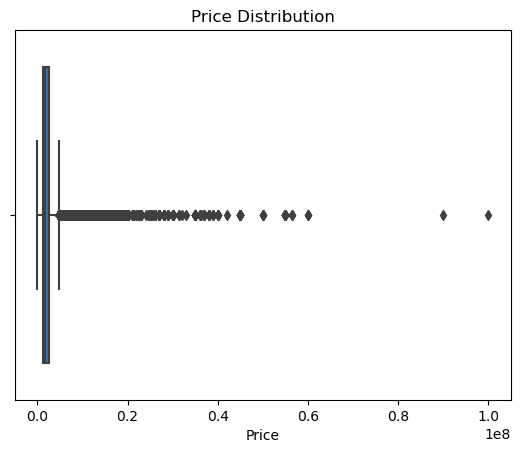

In [43]:
sns.boxplot(x=df['price'])
plt.xlabel('Price')
plt.title('Price Distribution')
plt.show()


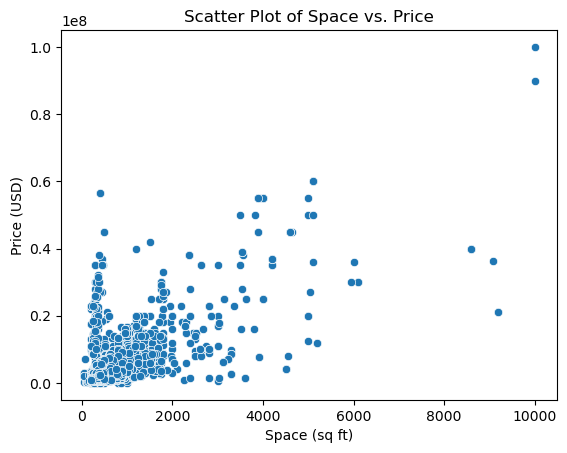

/opt/anaconda3/lib/python3.11/site-packages/dtale/describe.py:51: RuntimeWarning:

invalid value encountered in scalar divide

/opt/anaconda3/lib/python3.11/site-packages/dtale/describe.py:51: RuntimeWarning:

invalid value encountered in scalar divide



In [44]:
sns.scatterplot(data=df, x='space', y='price')
plt.xlabel('Space (sq ft)')
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of Space vs. Price')
plt.show()